# Trees Algorithms

In [1]:
import pandas as pd
import numpy as np
import warnings

import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

from IPython.display import HTML
from IPython.display import display

warnings.filterwarnings('ignore')

#%matplotlib ipympl # Interactive mode
%matplotlib inline

tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Importing neccesary libraries. <a href="javascript:code_toggle()">--></a>''')
display(tag)

### Define the selection criteria

In [2]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
dasdas. <a href="javascript:code_toggle()">--></a>''')
display(tag)

x = np.arange(0 , 1, 0.005)

def compare_selection_criteria(p, x): # x and p should be the same thing
    def gini(p):
        return p *(1 - p) + (1 - p) * (1-(1 - p))

    def entropy(p):
        return [-p * np.log2(p) - (1 - p) * np.log2(1 - p) 
                if p != 0 else None for p in x]

    def error_classification(p):
        return [1- np.max([i, 1 - i]) for i in p]
    
    plt.figure(1)
    
    plt.plot(x, gini(x), label='Gini', linestyle='-', color='r')
    plt.plot(x, entropy(x), label='Entropy', linestyle='--', color='g')
    plt.plot(x, error_classification(x), label='Classi_Error', 
             linestyle='-.', color='b')

    plt.title('Comparación de Criterios')
    plt.ylim([0, 1.1])
    plt.xlabel('Prob')
    plt.ylabel('Índice de impureza')
    plt.legend()
    
    plt.show()
    
    #return gini(x), entropy(x), error_classification(x)

plt.figure('Figure 1')
compare_selection_criteria(x, x)

### Define a function to classifier the areas

In [3]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
dasdasda. <a href="javascript:code_toggle()">--></a>''')
display(tag)

plt.close('Figure 1')

def classificator_areas_plot(model, x, y, name_model, test_idx=None):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_dark = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
                                
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), 
                         np.arange(y_min, y_max, 0.05))
    
    z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    
    plt.figure(3)
    plt.pcolormesh(xx, yy, z, cmap=cmap_light)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_dark)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title('The model is ' + name_model)
    plt.grid() # you can delete it, if you want to use a grid in the plot you can push g letter in your keyboard and the grid appear
    
    if test_idx != None:
        x_test, y_test = x[test_idx, :], y[test_idx]
        plt.scatter(x_test[:, 0], x_test[:, 1],
                    edgecolors='k',
                    facecolors='none',
                    label='Test')

### Generate a dataset

In [4]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
dasdasd. <a href="javascript:code_toggle()">--></a>''')
display(tag)

x, y = make_blobs(n_samples=100,
                  centers=3,
                  random_state=4,
                  cluster_std=0.65)

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2,
                                                    random_state=2)

# Plot the data
plt.figure('Figure 2')
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='Accent')
plt.title('Representación de los datos')
plt.grid()
plt.show()

print('Dataset (x)' + '\n', pd.DataFrame(x).head(), '\n')
print('Target (y)' + '\n', pd.Series(y).head(), '\n')

Dataset (x)
           0         1
0  9.010941  3.018410
1  9.161065  1.462378
2  8.839848  4.478882
3  9.650574  4.849071
4  8.621967  1.489239 

Target (y)
 0    1
1    0
2    1
3    1
4    0
dtype: int64 



### Define a Decision Tree Classifier Model

<Figure size 432x288 with 0 Axes>

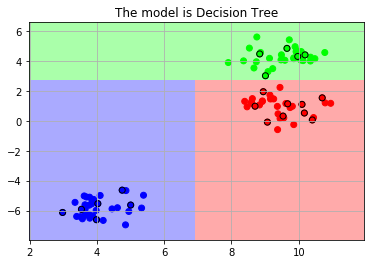

In [5]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
dasdas. <a href="javascript:code_toggle()">--></a>''')
display(tag)

plt.close('Figure 2')

deep = 2

tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=deep,
                              random_state=0).fit(x_train, y_train)

x_combined = np.vstack((x_train, x_test))
y_combined = np.hstack((y_train, y_test))


plt.figure('Figure 3')
classificator_areas_plot(tree, x_combined, y_combined, 'Decision Tree', 
                         test_idx=range(len(y_train), len(y_combined)))

### Define a Random Forest Classifier Model

<Figure size 432x288 with 0 Axes>

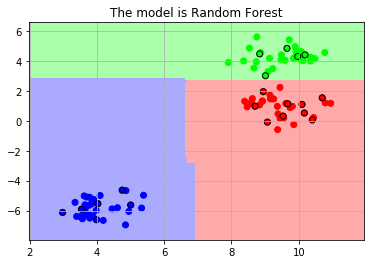

In [6]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
dasdas. <a href="javascript:code_toggle()">--></a>''')
display(tag)

plt.close('Figure 3')

forest = RandomForestClassifier(criterion='entropy',
                                max_depth=3,
                                n_estimators=10,
                                random_state=0)

classi_forest = forest.fit(x_train, y_train)

plt.figure('Figure 4')
classificator_areas_plot(classi_forest, x_combined, y_combined, 
                         'Random Forest',
                        test_idx=range(len(y_train), len(y_combined)))

### Compare both Models

<Figure size 432x288 with 0 Axes>

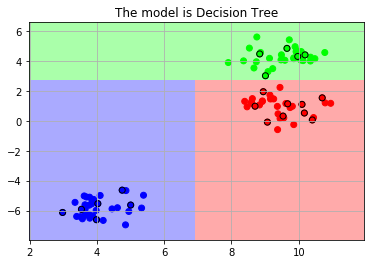

<Figure size 432x288 with 0 Axes>

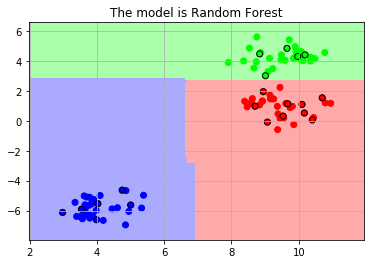

In [7]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
dasdasd. <a href="javascript:code_toggle()">--></a>''')
display(tag)

plt.close('Figure 4')

plt.figure('Decision Tree')
classificator_areas_plot(tree, x_combined, y_combined, 'Decision Tree', 
                         test_idx=range(len(y_train), len(y_combined)))
plt.show()

plt.figure('Random Forest')
classificator_areas_plot(classi_forest, x_combined, y_combined, 
                         'Random Forest',
                        test_idx=range(len(y_train), len(y_combined)))